# Principal Component Analysis Tutorial

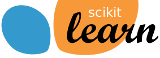

Image source: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

**Boeing Defect Prediction Team - Adam Dec, Gian Batayola, Koya Saito, Connor Bergman, and Brett Geunes**

Principal component analysis is one of the favorite methods of dimensionality reduction among data scientists. PCA is very useful in taking datasets with a large number of features and cutting them down to a small number of principal components. PCA can be very useful as an unsupervised learning method as it as it does not require knowledge of the labels in the data.

## Installation of sklearn

You may find the documentation for the PCA specific sklearn package here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

If you do not already have the sklearn (which is short for scikit-learn) package, install it on your computer with the following command:

In [1]:
# pip install -U scikit-learn

Or if you need to upgrade to the latest version, run the following cell:

In [2]:
# pip install --upgrade scikit-learn

## Access the necessary software

In [3]:
# import the package necessary to execute PCA
# this is just one of many packages that can run PCA
from sklearn.decomposition import PCA
# load the sample dataset that we will be using
from sklearn.datasets import load_iris
# import the package necessary to scale the data
from sklearn.preprocessing import StandardScaler
# our visualization package of choice
import matplotlib.pyplot as plt

### Mathmatical Explanation
Principal Component Analysis (PCA) is a mathematical technique used for dimensionality reduction and feature extraction in data analysis and machine learning. The primary goal of PCA is to transform the original high-dimensional dataset into a new coordinate system, where the data's variance is maximized along the principal components (PCs). Here's a mathematical explanation of PCA:

Let's assume you have a dataset with n observations and p variables represented by a matrix X of size n times p, where each row corresponds to an observation, and each column corresponds to a variable. The aim of PCA is to find a set of orthogonal vectors, known as principal components, that capture the maximum variance in the data.

1. **Centering the Data:**
   - Subtract the mean of each variable from the corresponding column of X to center the data. This is done by subtracting the mean vector $\bar{x}$ from each row of X.

   $X_{centered} = X - \bar{x}$ 

2. **Covariance Matrix:**
   - Calculate the covariance matrix S of the centered data. The covariance matrix measures the relationships between variables and is represented as:

   $S = \frac{1}{n-1} \cdot (X_{\text{centered}}^T \cdot X_{\text{centered}})$

3. **Eigendecomposition:**
   - Perform eigendecomposition on the covariance matrix S to find its eigenvalues $\lambda_i$ and corresponding eigenvectors $v_i$.

   $S \cdot v_i = \lambda_i \cdot v_i$

   The eigenvectors represent the directions (principal components) of maximum variance in the data, and the corresponding eigenvalues represent the magnitude of that variance along each eigenvector.

4. **Selecting Principal Components:**
   - Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the k largest eigenvalues. These k eigenvectors form the basis for the new subspace.

   $V_k = [v_1, v_2, ..., v_k]$

5. **Projection:**
   - Project the original data onto the new subspace spanned by the selected principal components. The transformed dataset is given by:

   $X_{\text{transformed}} = X_{\text{centered}} \cdot V_k$

   This projection results in a new dataset with reduced dimensionality, where k represents the desired number of principal components.

PCA is a powerful technique for reducing dimensionality while retaining as much variance as possible in the data. It is widely used in various fields such as data analysis, image processing, and machine learning.

# Code Example

### Load in a dataset

For our code example, we will be using the infamous iris dataset. While the iris dataset does not have such a large number of features that it requires dimensionality reduction, the dataset is simple enough to use as an example.

In [4]:
# features are stored in data matrix X, labels stored in vector y
X,y = load_iris(return_X_y=True)

### Scale data 

A PCA model is largely affected by the scale of the features given. Therefore, scaling each feature before running PCA is  a good idea.

In [5]:
# we use sklearn's standard scaler here as we transform X
scaler = StandardScaler()
scaler.fit(X)
X_transform = scaler.transform(X)

### Apply PCA

Without getting into heavy technical details, the PCA model takes an argument for the number of components, let's call it n. Using eigenvectors and eigenvalues, PCA will select the largest n eigenvalues and their corresponding eigenvectors are the top n components. These components attempt to represent the entire dataset in the reduced dimensions and try to encompass the most variability in the data that it can.

In [6]:
# create the model, fit it with the scaled data, and transform to the components
pca=PCA(n_components=3)
pca.fit(X_transform)
X =pca.transform(X_transform)

### Visualize Components

These components stored in the X variable can be used for further analysis. As an exercise, we will visualize these components in a graph found below.

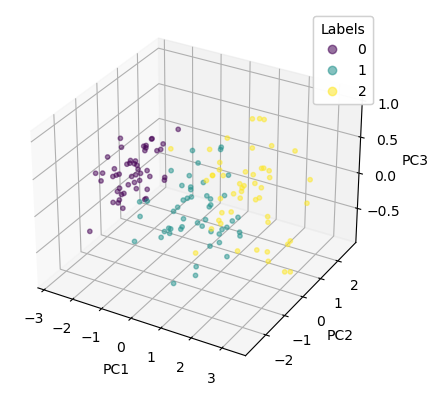

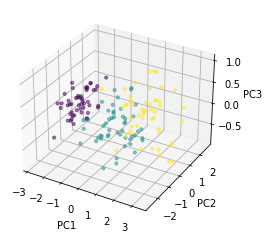

In [7]:
# create the 3D visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=10, alpha=0.5)

ax.set_xlabel("PC1", fontsize=10)
ax.set_ylabel("PC2", fontsize=10)
ax.set_zlabel("PC3", fontsize=10)

# Adding color legend
legend = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend)

plt.show()